In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
pistachio = pd.read_csv("pistachio.csv") #https://www.kaggle.com/datasets/amirhosseinmirzaie/pistachio-types-detection?resource=download
pistachio["Class"] = pistachio["Class"].replace({"Kirmizi_Pistachio":0,"Siit_Pistachio":1})
pistachio

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,0
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,1
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,0
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,0
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570,2071.4451,418.0258,217.1458,0.8545,288.9400,0.8976,73054,0.5945,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197,0
1714,68849,1441.2590,451.0457,205.2553,0.8905,296.0764,0.9340,73716,0.6459,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469,0
1715,90270,1370.5380,428.9636,269.8232,0.7774,339.0211,0.9722,92847,0.7400,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930,1
1716,73148,1309.8430,469.0491,208.3141,0.8960,305.1801,0.9376,78014,0.6341,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532,0


In [3]:
X = pistachio.drop(['Class'], axis = 1)
y = pistachio['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)

In [6]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("accuracy =", accuracy_score(y_test,pred))

[[186  24]
 [ 33 101]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       210
           1       0.81      0.75      0.78       134

    accuracy                           0.83       344
   macro avg       0.83      0.82      0.82       344
weighted avg       0.83      0.83      0.83       344

accuracy = 0.8343023255813954


In [7]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

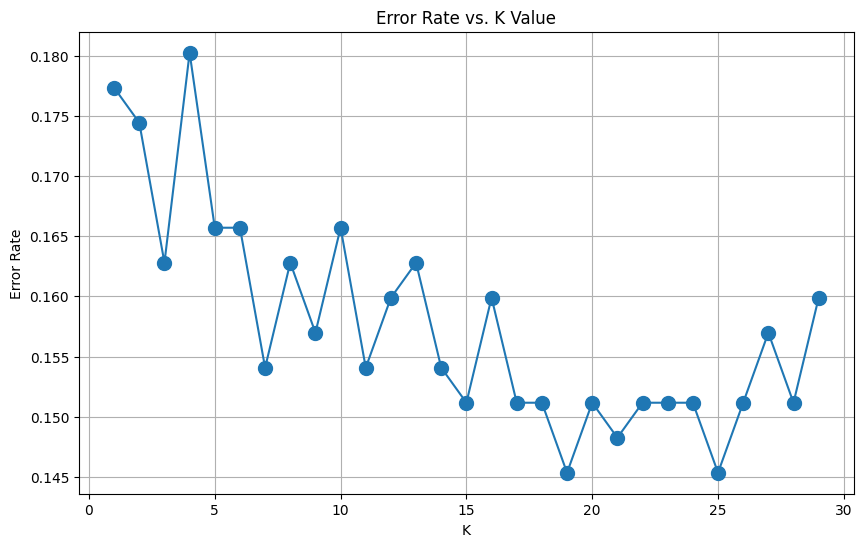

In [8]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [9]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("accuracy =", accuracy_score(y_test,pred))

[[185  25]
 [ 31 103]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       210
           1       0.80      0.77      0.79       134

    accuracy                           0.84       344
   macro avg       0.83      0.82      0.83       344
weighted avg       0.84      0.84      0.84       344

accuracy = 0.8372093023255814
